# Harmony PI 20.3 Demo

This notebook provides condensed examples of using Harmony to perform specific features that were built for PI 20.3.  For more a general introduction and tutorial, see [Harmony API Introduction](./Harmony%20Api%20Introduction.ipynb).  Useful helpers for making the calls found in this note book can be found under the [docs/notebook-helpers](./notebook-helpers) folder

## Prerequisites

1. Install Python 3.  This notebook is tested to work in 3.8 but should work in most recent 3.x versions.
2. Install Jupyter: `pip install jupyterlab`
3. Setup your `~/.netrc` for Earthdata Login as described in [Harmony API Introduction](./Harmony%20Api%20Introduction.ipynb)
4. Run the following cell to install Python dependencies, import necessary modules, and set notebook defaults

In [ ]:
%env AWS_ACCESS_KEY_ID='***REMOVED***'
%env AWS_SECRET_ACCESS_KEY='***REMOVED***'
#%env AWS_SESSION_TOKEN='***REMOVED***'

In [ ]:
!echo $AWS_ACCESS_KEY_ID

In [1]:
%pwd

'/home/ec2-user/harmony/docs/team_demos'

In [2]:
# If in /team_demos back up a directory in order to install notebook_helpers/requirements.txt
%cd .. 

/home/ec2-user/harmony/docs


In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline

import sys
# Install dependencies into the Jupyter Kernel
!{sys.executable} -m pip install -q -r notebook_helpers/requirements.txt

# Install dependencies into the Jupyter Kernel
#!{sys.executable} -m pip install intake-stac

#!{sys.executable} -m pip install s3fs==0.5.0
#!{sys.executable} -m conda install s3fs=0.5.0 -c conda-forge --yes

# Import libraries used throughout the notebook
from notebook_helpers import get, post, show, get_data_urls, show_async, show_async_condensed, print_async_status, show_shape
import json
import intake
import s3fs

## ASF Data Transformations in Harmony's Production Environment

ASF's Sentinel-1 Interferograms (BETA) product is wired up to Harmony's new production environment.

In [4]:
# asf_collection = 'C1595422627-ASF'
# coverages_root = 'https://harmony.earthdata.nasa.gov/{collection}/ogc-api-coverages/1.0.0/collections/{variable}/coverage/rangeset'

# testing UAT
asf_collection = 'C1225776654-ASF'
coverages_root = 'https://harmony.uat.earthdata.nasa.gov/{collection}/ogc-api-coverages/1.0.0/collections/{variable}/coverage/rangeset'

### Variable and spatial subsetting with projecting, reformtatting output to PNG and spatial constraints
Each parent NetCDF is approx. 60 MB and the subsetted pngs and geotiffs are well under 1 MB each.

GET /C1225776654-ASF/ogc-api-coverages/1.0.0/collections/%2Fscience%2Fgrids%2Fdata%2Fcoherence/coverage/rangeset?format=image%2Fpng&outputcrs=EPSG%3A2230&subset=lon%28-115.5%3A-115.25%29&subset=lat%2833%3A33.1%29&subset=time%28%222020-03-13T00%3A00%3A00Z%22%3A%222020-03-13T23%3A59%3A59Z%22%29
Async response at 23:22:01
{
  "username": "amy.steiker",
  "status": "running",
  "message": "The job is being processed",
  "progress": 0,
  "createdAt": "2020-09-23T23:22:00.793Z",
  "updatedAt": "2020-09-23T23:22:00.793Z",
  "links": [
    {
      "title": "Job Status",
      "href": "https://harmony.uat.earthdata.nasa.gov/jobs/ce516698-95a5-4a8b-9d4d-7f3b1e709484",
      "rel": "self",
      "type": "application/json"
    }
  ],
  "request": "https://harmony.uat.earthdata.nasa.gov/C1225776654-ASF/ogc-api-coverages/1.0.0/collections/%2Fscience%2Fgrids%2Fdata%2Fcoherence/coverage/rangeset?format=image%2Fpng&outputcrs=EPSG%3A2230&subset=lon(-115.5%3A-115.25)&subset=lat(33%3A33.1)&subset=time(%22

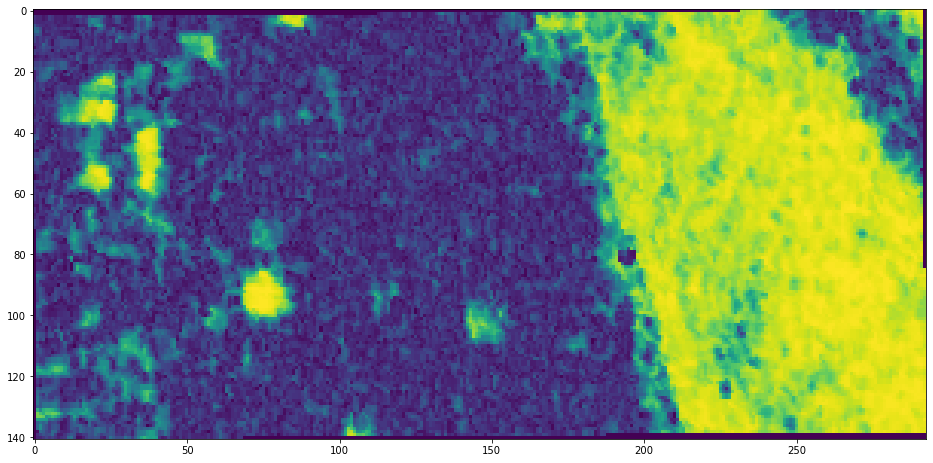

Waiting for updates...
Async response at 23:22:11
{
  "username": "amy.steiker",
  "status": "running",
  "message": "The job is being processed",
  "progress": 100,
  "createdAt": "2020-09-23T23:22:00.793Z",
  "updatedAt": "2020-09-23T23:22:10.748Z",
  "links": [
    {
      "title": "Job Status",
      "href": "https://harmony.uat.earthdata.nasa.gov/jobs/ce516698-95a5-4a8b-9d4d-7f3b1e709484",
      "rel": "self",
      "type": "application/json"
    },
    {
      "href": "https://harmony.uat.earthdata.nasa.gov/service-results/harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png",
      "title": "G1234646236-ASF",
      "type": "image/png",
      "rel": "data",
      "bbox": [
        -115.5,
        33,
        -115.25,
        33.1
      ],
      "temporal": {
        "start": "2020-03-13T01:41:06.357Z",
        "

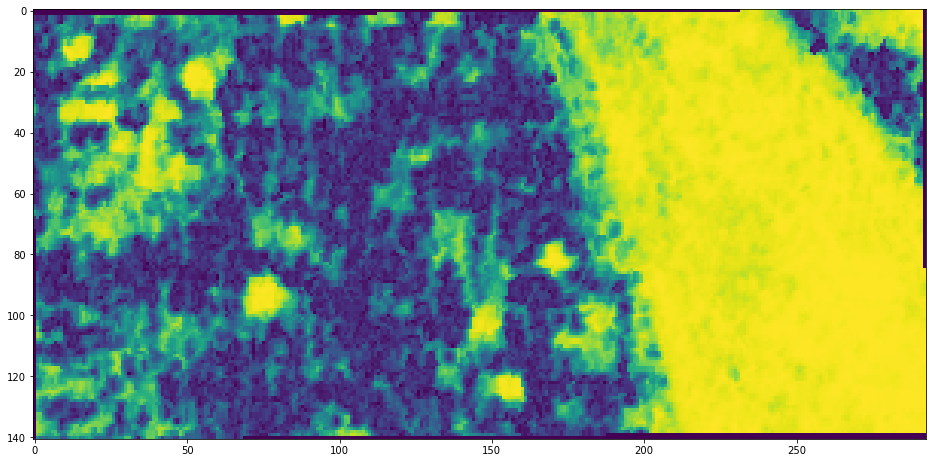

Waiting for updates...
Async response at 23:22:17
{
  "username": "amy.steiker",
  "status": "successful",
  "message": "The job has completed successfully",
  "progress": 100,
  "createdAt": "2020-09-23T23:22:00.793Z",
  "updatedAt": "2020-09-23T23:22:16.563Z",
  "links": [
    {
      "title": "Job Status",
      "href": "https://harmony.uat.earthdata.nasa.gov/jobs/ce516698-95a5-4a8b-9d4d-7f3b1e709484",
      "rel": "self",
      "type": "application/json"
    },
    {
      "title": "STAC catalog",
      "href": "https://harmony.uat.earthdata.nasa.gov/stac/ce516698-95a5-4a8b-9d4d-7f3b1e709484/",
      "rel": "stac-catalog-json",
      "type": "application/json"
    },
    {
      "href": "https://harmony.uat.earthdata.nasa.gov/service-results/harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png",
      "title": "G1

<Response [200]>

In [5]:
response = get(
    coverages_root.format(
        collection=asf_collection, 
        variable='%2Fscience%2Fgrids%2Fdata%2Fcoherence'), 
    params={
       # 'granuleID': ['G1715962900-ASF', 'G1715965586-ASF'],
        'format': 'image/png',
        'outputcrs': 'EPSG:2230',
        'subset': [
            'lon(-115.5:-115.25)', 
            'lat(33:33.1)',
            #'time("2020-03-12T00:00:00Z":"2020-03-13T03:00:00Z")'
            'time("2020-03-13T00:00:00Z":"2020-03-13T23:59:59Z")'
            ]})
show_async(response)

### Response includes STAC catalog...

### store job ID to create stac location

In [6]:
results = json.loads(response.content)
job = results['jobID']
print(job)

stac_root = 'https://harmony.uat.earthdata.nasa.gov/stac/{jobID}/'

ce516698-95a5-4a8b-9d4d-7f3b1e709484


## Open STAC Catalog using `intake-stac`

Using http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/intake.html for guidance...


In [7]:
stac_cat = intake.open_stac_catalog(stac_root.format(jobID=job),name='Harmony output')
display(list(stac_cat))

['ce516698-95a5-4a8b-9d4d-7f3b1e709484_0',
 'ce516698-95a5-4a8b-9d4d-7f3b1e709484_1']

In [8]:
stac_item_0 = list(stac_cat)[0]
print(stac_cat[stac_item_0])

<Intake catalog: ce516698-95a5-4a8b-9d4d-7f3b1e709484_0>


In [9]:
for id, entry in stac_cat.search('type').items():
    display(entry)

name: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
container: xarray
plugin: ['xarray_image']
description: G1234646236-ASF
direct_access: True
user_parameters: []
metadata: 
  href: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  title: G1234646236-ASF
  type: image/png
  roles: ['overview']
args: 
  urlpath: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  chunks: 

name: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-D-R-173-tops-20200313_20200224-134348-34565N_32585N-PP-1b6a-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
container: xarray
plugin: ['xarray_image']
description: G1234646241-ASF
direct_access: True
user_parameters: []
metadata: 
  href: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-D-R-173-tops-20200313_20200224-134348-34565N_32585N-PP-1b6a-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  title: G1234646241-ASF
  type: image/png
  roles: ['overview']
args: 
  urlpath: s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-D-R-173-tops-20200313_20200224-134348-34565N_32585N-PP-1b6a-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  chunks: 

## Access Harmony outputs directly from STAC 

In [10]:
da = stac_cat[stac_item_0]['s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/f561a2e0-a480-4328-b06f-039c99386ea1/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png'].to_dask()
da

<xarray.DataArray (y: 141, x: 293)>
dask.array<xarray-<this-array>, shape=(141, 293), dtype=uint8, chunksize=(141, 293), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 132 133 134 135 136 137 138 139 140
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 284 285 286 287 288 289 290 291 292

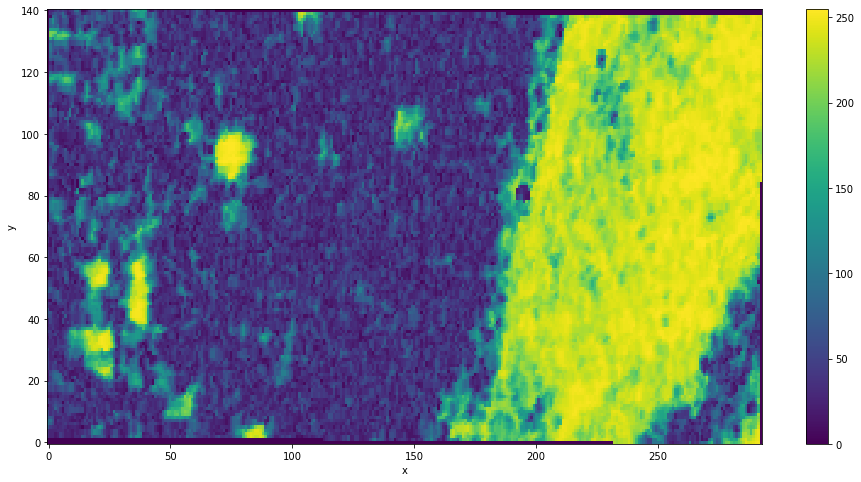

In [12]:
da.plot.imshow()

### try from s3fs

In [ ]:
# older versions of s3fs
# fs = s3fs.S3FileSystem(region_name='us-west-2')

# import botocore
# client_session = botocore.session.Session(profile='NON-DEFAULT-PROFILE')
# fs = s3fs.S3FileSystem(session=client_session, client_kwargs={'region_name':'us-west-2'})

fs = s3fs.S3FileSystem(client_kwargs={'region_name':'us-west-2'})

store = fs.get_mapper(root='s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/1a6d8c8b-7eb4-4039-b11a-de3694578c6c/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png', check=False)
#zarr_file = zarr.open(store)
print(store)

s3://harmony-uat-staging/public/asfdataservices/gdal-subsetter/767bbff9-5bba-450b-89e2-7a1d25653e43/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3
import io

s3 = boto3.resource('s3', region_name='us-west-2')
bucket = s3.Bucket('harmony-uat-staging')
object = bucket.Object('public/asfdataservices/gdal-subsetter/767bbff9-5bba-450b-89e2-7a1d25653e43/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png')

file_stream = io.StringIO()
object.download_fileobj(file_stream)
img = mpimg.imread(file_stream)

In [ ]:
import boto3
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

resource = boto3.resource('s3', region_name='us-west-2')
bucket = resource.Bucket('harmony-uat-staging')

image_object = bucket.Object('public/asfdataservices/gdal-subsetter/767bbff9-5bba-450b-89e2-7a1d25653e43/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png')
image = mpimg.imread(BytesIO(image_object.get()['Body'].read()), 'png')

plt.figure(0)
plt.imshow(image)

(taken from Zarr notebook... Do we need to do something similar for STAC access??)

## Set Up AWS

Now that you have Zarr links, you can access them with your AWS credentials to the Harmony account.  Obtain the credentials and make sure your default AWS account uses them.  One way to do this is to edit `~/.aws/credentials` to have the following section:
```
[default]
aws_access_key_id = YOUR_HARMONY_ACCESS_KEY_ID
aws_secret_access_key = YOUR_HARMONY_SECRET_ACCESS_KEY
```
Restart your Jupyter kernel after completing this step